<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>




# 서울시 인구 분석

<img src='https://raw.githubusercontent.com/Jangrae/img/master/people2.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 pop01, pop02, pop03 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
- 단축 경로1: 'https://bit.ly/PopH01File'
- 단축 경로2: 'https://bit.ly/PopH02File'
- 단축 경로3: 'https://bit.ly/PopH03File'

In [3]:
# pop01 데이터 읽어오기
path = 'https://bit.ly/PopH01File'
pop01 = pd.read_csv(path)
path = 'https://bit.ly/PopH02File'
pop02 = pd.read_csv(path)
path = 'https://bit.ly/PopH03File'
pop03 = pd.read_csv(path)

# 확인
print(pop01)


    year  k_male  k_female
0   1981    4160      4191
1   1982    4160      4191
2   1983    4160      4191
3   1984    4160      4191
4   1985    4160      4191
5   1986    4899      4888
6   1987    5000      4979
7   1988    5156      5120
8   1989    5305      5261
9   1990    5321      5282
10  1991    5468      5405
11  1992    5500      5435
12  1993    5478      5412
13  1994    5409      5351
14  1995    5302      5249
15  1996    5231      5187
16  1997    5187      5150
17  1998    5147      5124
18  1999    5141      5123
19  2000    5167      5145
20  2001    5142      5122
21  2002    5109      5098
22  2003    5085      5089
23  2004    5075      5098
24  2005    5062      5105
25  2006    5062      5119
26  2007    5063      5130
27  2008    5062      5139
28  2009    5059      5149
29  2010    5111      5201
30  2011    5074      5176
31  2012    5041      5154
32  2013    5008      5136
33  2014    4980      5123
34  2015    4931      5091
35  2016    4877      5054
3

In [7]:
# pop02 데이터 읽어오기

print(pop02)

# 확인


    year  f_male  f_female
0   1985       7         6
1   1986       7         5
2   1987       6         5
3   1988       5         5
4   1989       6         5
5   1990       5         4
6   1991      18        14
7   1992      19        16
8   1993      19        17
9   1994      21        19
10  1995      24        21
11  1996      27        25
12  1997      28        25
13  1998      27        24
14  1999      30        28
15  2000      32        30
16  2001      34        34
17  2002      36        37
18  2003      49        54
19  2004      54        61
20  2005      61        68
21  2006      83        92
22  2007     111       118
23  2008     123       132
24  2009     122       134
25  2010     125       137
26  2011     135       145
27  2012     118       129
28  2013     118       126
29  2014     129       137
30  2015     133       142
31  2016     131       143
32  2017     128       140
33  2018     137       147
34  2019     134       148
35  2020     115       128


In [8]:
# pop03 데이터 읽어오기

print(pop03)

# 확인


    year  household  older_65
0   1981       1915       246
1   1982       2001       260
2   1983       2116       260
3   1984       2246       275
4   1985       2338       211
5   1986       2428       305
6   1987       2518       329
7   1988       2658       349
8   1989       2817       363
9   1990       2820       363
10  1991       3330       424
11  1992       3383       434
12  1993       3431       445
13  1994       3456       454
14  1995       3448       460
15  1996       3457       469
16  1997       3499       485
17  1998       3459       505
18  1999       3491       530
19  2000       3540       560
20  2001       3570       586
21  2002       3624       613
22  2003       3715       650
23  2004       3780       693
24  2005       3871       736
25  2006       3979       787
26  2007       4046       852
27  2008       4098       899
28  2009       4117       943
29  2010       4224      1008
30  2011       4193      1049
31  2012       4178      1111
32  2013  

## 2. 데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 데이터프레임 크기 확인**

- 세 개의 데이터프레임 크기(행 수, 열 수)를 확인합니다.

In [4]:
# 데이터 크기 확인
print(pop01.shape)
print(pop02.shape)
print(pop03.shape)


(40, 3)
(36, 3)
(40, 3)


**2) year 최솟값, 최댓값 확인**

- 세 개의 데이터프레임 year열 최솟값, 최댓값 크기를 비교해 차이가 있는 지 각각 확인합니다.

In [5]:
# year 최댓값, 최솟값 확인
print(pop01['year'].min(), pop01['year'].max())
print(pop02['year'].min(), pop02['year'].max())
print(pop03['year'].min(), pop03['year'].max())

1981 2020
1985 2020
1981 2020


**3) 결측치 확인**

- 세 개의 데이터프레임에 결측치가 있는 지 각각 확인합니다.

In [6]:
# 결측치 확인
print(pop01.info())

print(pop02.info())

print(pop03.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   year      40 non-null     int64
 1   k_male    40 non-null     int64
 2   k_female  40 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   year      36 non-null     int64
 1   f_male    36 non-null     int64
 2   f_female  36 non-null     int64
dtypes: int64(3)
memory usage: 992.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       40 non-null     int64
 1   household  40 non-null     int64
 2   older_65   40 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB
None


## 3. 데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**

- concat을 사용해 연결하면 인덱스 값을 기준으로 연결되어 데이터가 어긋납니다.
- **year** 열을 기준으로 **outer** 방식으로 조인(병합)합니다.
- 외국인 정보가 1981 ~ 1984년이 누락되어 결측치가 발생할 것입니다.
- 세 개의 데이터프레임을 병합(조인)하여 pop 데이터프레임을 선언합니다.
- 이후의 모든 작업은 pop 데이터프레임을 대상으로 진행합니다.

In [7]:
# 데이터프레임 조인
pop = pd.merge(pop01, pop02, on='year', how='outer')
pop = pd.merge(pop, pop03, on = 'year', how='outer')

# 확인
print(pop)

    year  k_male  k_female  f_male  f_female  household  older_65
0   1981    4160      4191     NaN       NaN       1915       246
1   1982    4160      4191     NaN       NaN       2001       260
2   1983    4160      4191     NaN       NaN       2116       260
3   1984    4160      4191     NaN       NaN       2246       275
4   1985    4160      4191     7.0       6.0       2338       211
5   1986    4899      4888     7.0       5.0       2428       305
6   1987    5000      4979     6.0       5.0       2518       329
7   1988    5156      5120     5.0       5.0       2658       349
8   1989    5305      5261     6.0       5.0       2817       363
9   1990    5321      5282     5.0       4.0       2820       363
10  1991    5468      5405    18.0      14.0       3330       424
11  1992    5500      5435    19.0      16.0       3383       434
12  1993    5478      5412    19.0      17.0       3431       445
13  1994    5409      5351    21.0      19.0       3456       454
14  1995  

**2) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [8]:
# 결측치 확인
print(pop.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       40 non-null     int64  
 1   k_male     40 non-null     int64  
 2   k_female   40 non-null     int64  
 3   f_male     36 non-null     float64
 4   f_female   36 non-null     float64
 5   household  40 non-null     int64  
 6   older_65   40 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 2.5 KB
None


**3) 결측치 저리**

- 연도별 인구 현황이므로 임의의 값을 채우는 것이 바람직하지 않아 보입니다.
- 이후 값, 즉 1985년 값으로 채우는 것도 정확한 분석을 방해할 것 같습니다.
- 이에 결측치가 있는 1981년~1984년 행을 제거할 것입니다.

In [9]:
# 결측치 제거
pop.dropna(axis=0, inplace=True)
           
# 확인
print(pop)

    year  k_male  k_female  f_male  f_female  household  older_65
4   1985    4160      4191     7.0       6.0       2338       211
5   1986    4899      4888     7.0       5.0       2428       305
6   1987    5000      4979     6.0       5.0       2518       329
7   1988    5156      5120     5.0       5.0       2658       349
8   1989    5305      5261     6.0       5.0       2817       363
9   1990    5321      5282     5.0       4.0       2820       363
10  1991    5468      5405    18.0      14.0       3330       424
11  1992    5500      5435    19.0      16.0       3383       434
12  1993    5478      5412    19.0      17.0       3431       445
13  1994    5409      5351    21.0      19.0       3456       454
14  1995    5302      5249    24.0      21.0       3448       460
15  1996    5231      5187    27.0      25.0       3457       469
16  1997    5187      5150    28.0      25.0       3499       485
17  1998    5147      5124    27.0      24.0       3459       505
18  1999  

**3) 열 추가**

- 이후 분석의 편의를 위해 다음과 같은 의미를 갖는 열을 추가하고자 합니다.
    - k_total = 전체 한국인 인구수
    - f_total = 전체 외국인 인구수
    - male = 전체 남자 인구수
    - female = 전체 여자 인구수
    - total = 전체 인구수
- 추가할 열에 대한 공식은 다음과 같습니다.
    - k_total = k_male + k_female
    - f_total = f_male + f_female
    - male = k_male + f_male
    - female = k_female + f_female
    - total = k_total + f_total
- 정리한 공식에 따라 데이터프레임에 열을 추가합니다.

In [10]:
# 열 추가
pop['k_total'] = pop['k_male'] + pop['k_female']
pop['f_total'] = pop['f_male'] + pop['f_female']
pop['male'] = pop['k_male'] + pop['f_male']
pop['female'] = pop['k_female'] + pop['f_female']
pop['total'] = pop['k_total'] + pop['f_total']

#  확인
print(pop)

    year  k_male  k_female  f_male  f_female  household  older_65  k_total  \
4   1985    4160      4191     7.0       6.0       2338       211     8351   
5   1986    4899      4888     7.0       5.0       2428       305     9787   
6   1987    5000      4979     6.0       5.0       2518       329     9979   
7   1988    5156      5120     5.0       5.0       2658       349    10276   
8   1989    5305      5261     6.0       5.0       2817       363    10566   
9   1990    5321      5282     5.0       4.0       2820       363    10603   
10  1991    5468      5405    18.0      14.0       3330       424    10873   
11  1992    5500      5435    19.0      16.0       3383       434    10935   
12  1993    5478      5412    19.0      17.0       3431       445    10890   
13  1994    5409      5351    21.0      19.0       3456       454    10760   
14  1995    5302      5249    24.0      21.0       3448       460    10551   
15  1996    5231      5187    27.0      25.0       3457       46

**4) (옵션) 열 순서 변경**

- 데이터 이해를 돕기 위해 다음과 같은 순서로 데이터프레임 열 순서를 변경합니다.
- year, household, total, male, female, k_total, k_male, k_female, f_total, f_male, f_female, older_65


In [11]:
# 열 순서 변경
pop = pop[['year', 'household', 'total', 'male', 'female', 'k_total', 'k_male', 'k_female', 'f_total', 'f_male', 'f_female', 'older_65']]


# 확인
print(pop)

    year  household    total    male  female  k_total  k_male  k_female  \
4   1985       2338   8364.0  4167.0  4197.0     8351    4160      4191   
5   1986       2428   9799.0  4906.0  4893.0     9787    4899      4888   
6   1987       2518   9990.0  5006.0  4984.0     9979    5000      4979   
7   1988       2658  10286.0  5161.0  5125.0    10276    5156      5120   
8   1989       2817  10577.0  5311.0  5266.0    10566    5305      5261   
9   1990       2820  10612.0  5326.0  5286.0    10603    5321      5282   
10  1991       3330  10905.0  5486.0  5419.0    10873    5468      5405   
11  1992       3383  10970.0  5519.0  5451.0    10935    5500      5435   
12  1993       3431  10926.0  5497.0  5429.0    10890    5478      5412   
13  1994       3456  10800.0  5430.0  5370.0    10760    5409      5351   
14  1995       3448  10596.0  5326.0  5270.0    10551    5302      5249   
15  1996       3457  10470.0  5258.0  5212.0    10418    5231      5187   
16  1997       3499  1039

**5) (옵션) 인덱스 초기화**

- 인덱스가 0부터 시작하는 일련 변호를 갖지 않는다면 인덱스를 초기화합니다.

In [12]:
# 인덱스 초기화
pop.reset_index(drop=True, inplace=True)

# 확인
print(pop)

    year  household    total    male  female  k_total  k_male  k_female  \
0   1985       2338   8364.0  4167.0  4197.0     8351    4160      4191   
1   1986       2428   9799.0  4906.0  4893.0     9787    4899      4888   
2   1987       2518   9990.0  5006.0  4984.0     9979    5000      4979   
3   1988       2658  10286.0  5161.0  5125.0    10276    5156      5120   
4   1989       2817  10577.0  5311.0  5266.0    10566    5305      5261   
5   1990       2820  10612.0  5326.0  5286.0    10603    5321      5282   
6   1991       3330  10905.0  5486.0  5419.0    10873    5468      5405   
7   1992       3383  10970.0  5519.0  5451.0    10935    5500      5435   
8   1993       3431  10926.0  5497.0  5429.0    10890    5478      5412   
9   1994       3456  10800.0  5430.0  5370.0    10760    5409      5351   
10  1995       3448  10596.0  5326.0  5270.0    10551    5302      5249   
11  1996       3457  10470.0  5258.0  5212.0    10418    5231      5187   
12  1997       3499  1039

## 4. 데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 전체 인구 변화**

- 전체 인구 변화를 선 그래프로 시각화해 확인합니다.

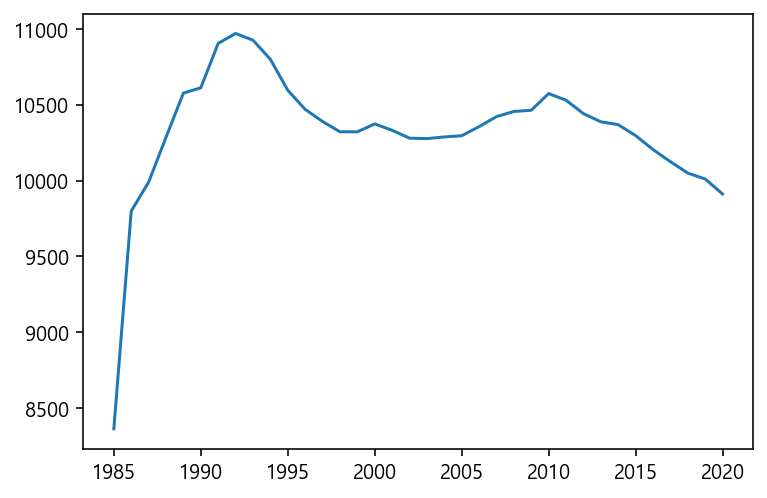

In [13]:
# 전체 인구 변화
plt.plot(pop['year'],pop['total'])
plt.show()


**2) 남녀 인구 변화**

- 전체 남녀 인구 변화를 선 그래프로 시각화해 확인합니다.


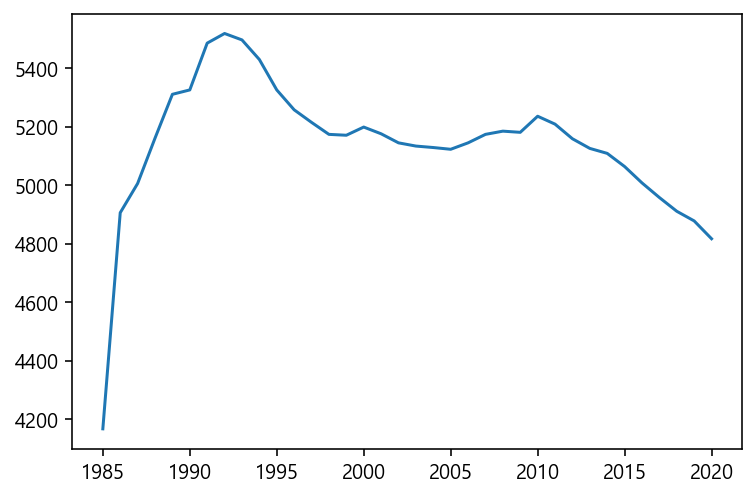

In [14]:
# 남녀 인구 변화

plt.plot(pop['year'],pop['male'])
plt.show()


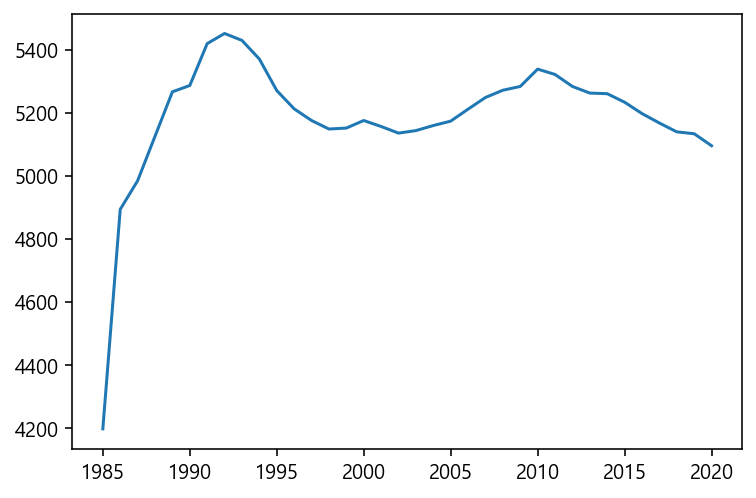

In [15]:
plt.plot(pop['year'],pop['female'])
plt.show()

**3) 한국인 인구 변화**

- 한국인 인구 변화를 선 그래프로 시각화해 확인합니다.

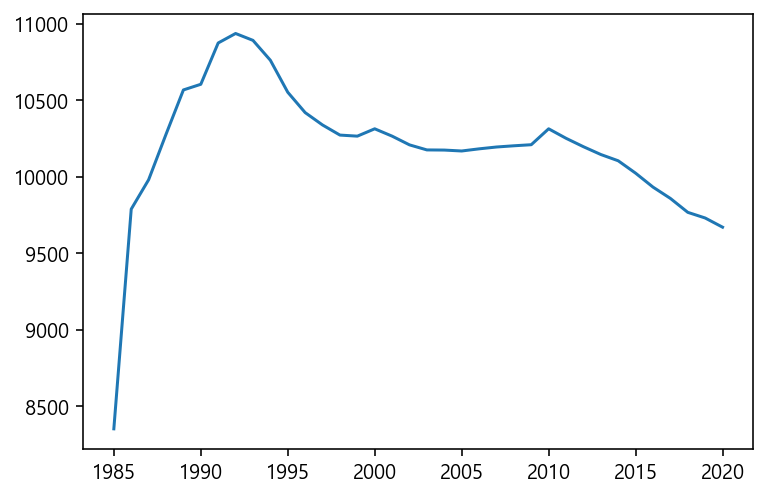

In [20]:
# 한국인 남녀 인구 변화

plt.plot(pop['year'],pop['k_total'])
plt.show()


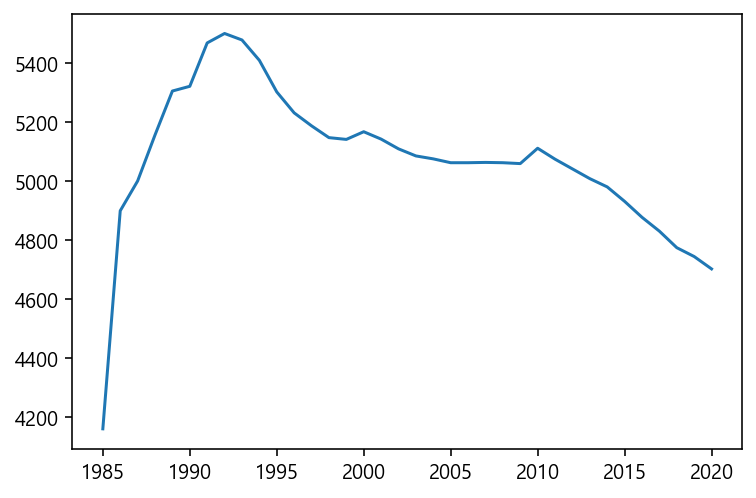

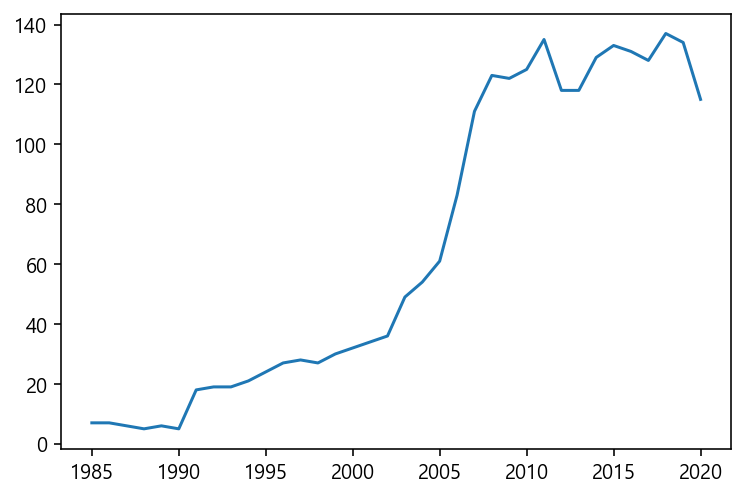

In [25]:
plt.plot(pop['year'],pop['k_male'])
plt.show()
plt.plot(pop['year'],pop['f_male'])
plt.show()

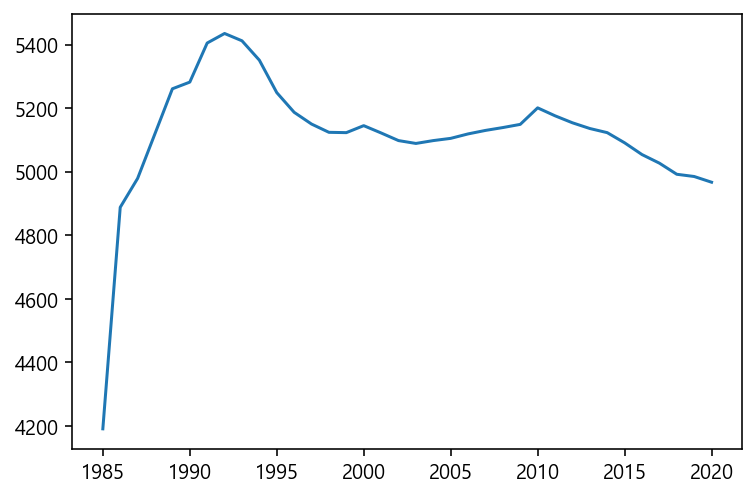

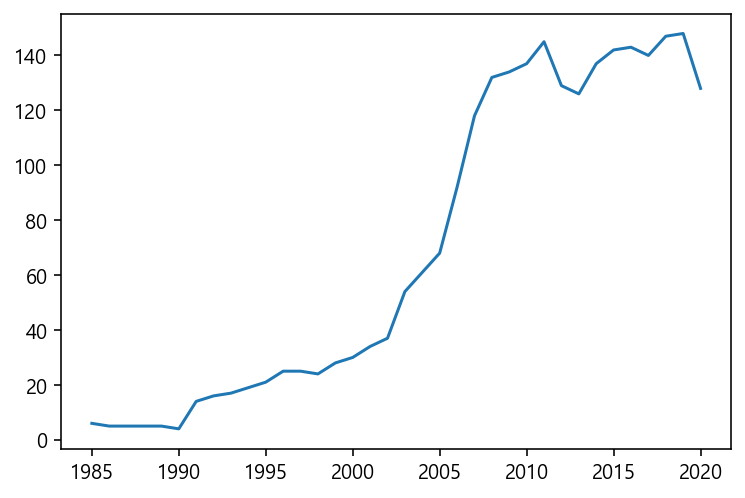

In [24]:
plt.plot(pop['year'],pop['k_female'])
plt.show()
plt.plot(pop['year'],pop['f_female'])
plt.show()

**4) (옵션) 외국인 인구 변화**

- 외국인 인구 변화를 선 그래프로 시각화해 확인합니다.

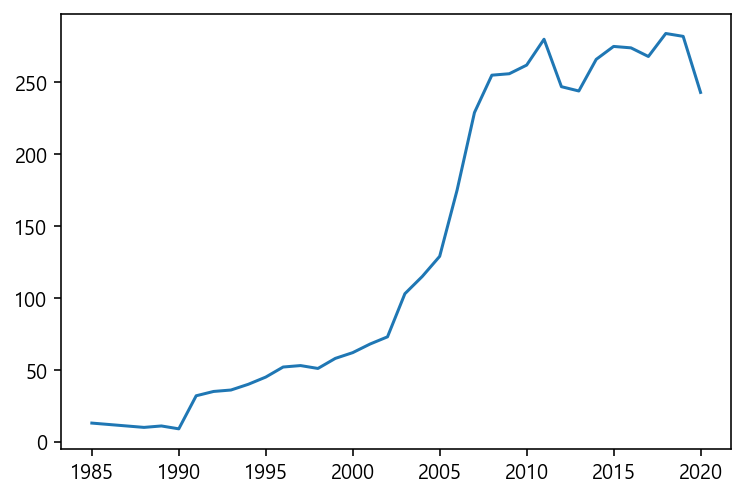

In [17]:
# 외국인 남녀 인구 변화

plt.plot(pop['year'],pop['f_total'])
plt.show()



**5) (옵션) 가구수 변화**

- 가구수 변화를 선 그래프로 시각화해 확인합니다.

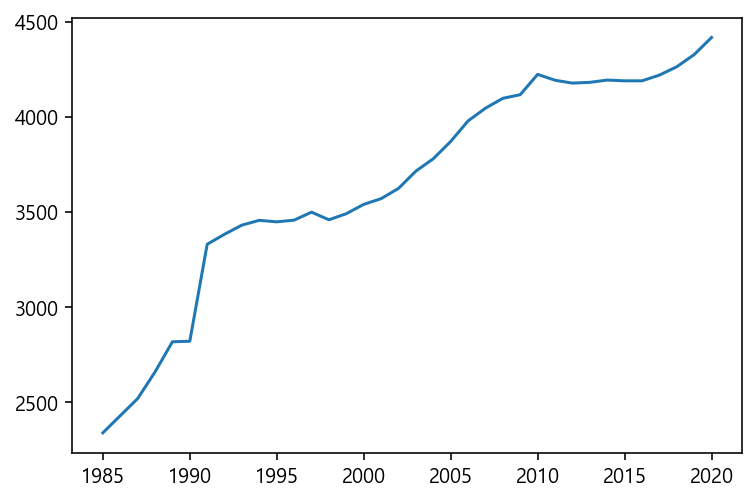

In [18]:
# 가구수 변화
plt.plot(pop['year'],pop['household'])
plt.show()



**6) (옵션) 노령인구 변화**

- 노령인구 변화를 선 그래프로 시각화해 확인합니다.

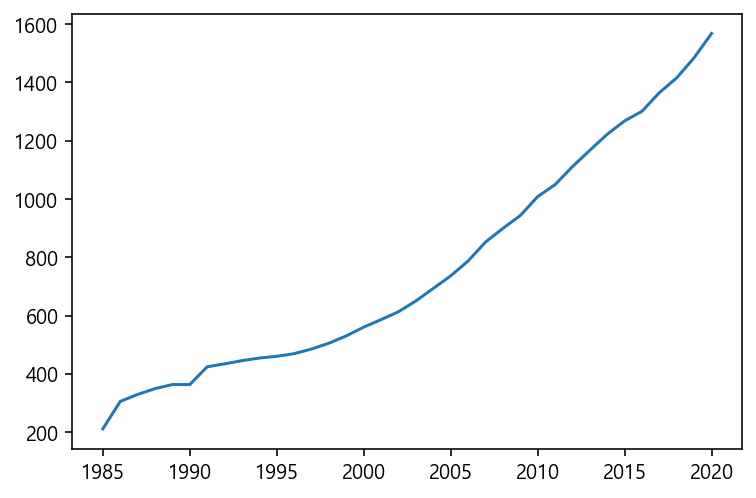

In [19]:
# 65세 이상 변화
plt.plot(pop['year'],pop['older_65'])
plt.show()




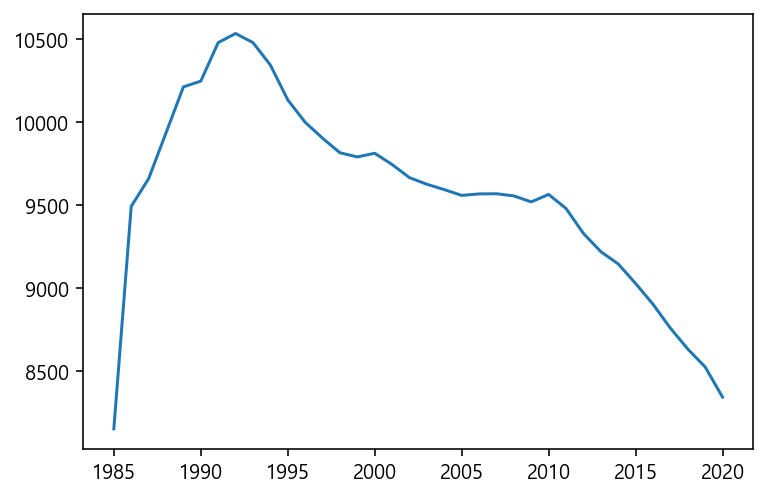

In [28]:
#65세 미만 젊은 세대 인구수변화
plt.plot(pop['year'],pop['total']-pop['older_65'])
plt.show()

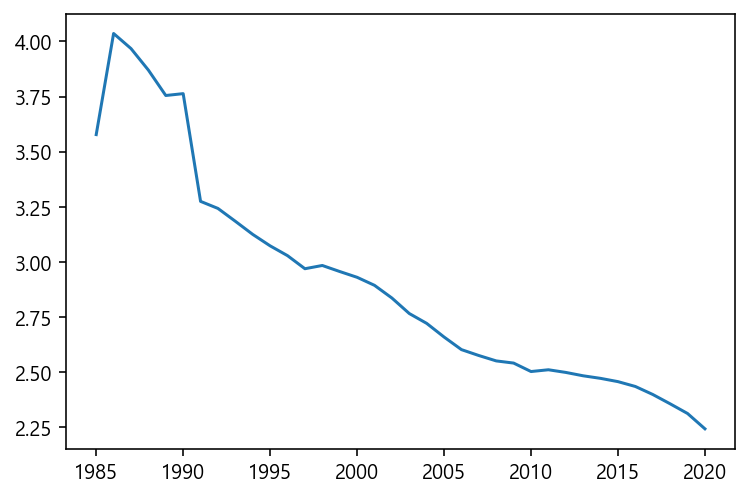

In [29]:
#서울시내 가구당 인구수 변화
plt.plot(pop['year'],pop['total']/pop['household'])
plt.show()


## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

- 시간이 지날 수록 노령인구가 많아지고 있다.
- 전체 인구수는 다소 감소하는 추세이다.
- 가구수는 증가하고 있다.
- 서울에 거주하는 외국인 숫자는 늘어나고 있다.
- 65세 미만 젊은 세대의 인구수는 확연하게 감소하고 있다.
- 가구당 인구수가 2020년 2초반대로 감소하고 있는것으로 볼때 1인가구와 2인가구가 증가하고 있는것으로 보인다.

**2) 기타**

- 방대한 양의 데이터를 빠르고 보기쉽게 분석 할 수 있었다.
- 다양한 그래프를 통해 새로운 점을 알 수 있었습니다.
- 
- 
- 